<a href="https://colab.research.google.com/github/grettynazario/TP1-orgaDatos/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 75.06/95.58 Organización de Datos
# Primer Cuatrimestre de 2020
# Trabajo Práctico 1: Enunciado


El trabajo práctico 1 de la materia se basa en el análisis de los tweets del set de datos de la competencia: https://www.kaggle.com/c/nlp-getting-started.  

* `id` - identificador unico para cada  tweet

* `text` - el texto del tweet

* `location` - ubicación desde donde fue enviado (podría no estar)

* `keyword` - un keyword para el tweet  (podría faltar)

* `target` - en train.csv, indica si se trata de un desastre real  (1) o no (0)





El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no, ambas son de interés.

Los requisitos de la primera entrega son los siguientes:

* El análisis debe estar hecho en Python Pandas o R.

* El análisis debe entregarse en formato pdf vía gradescope. En el informe no va código.

* Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.


La evaluación del TP se realizará en base al siguiente criterio:

* Originalidad del análisis exploratorio. 

* Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 

* Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 

* Calidad de las visualizaciones presentadas.
 * ¿Tienen todos los ejes su rótulo?
 * ¿Tiene cada visualización un título?
 * ¿Es entendible la visualización sin tener que leer la explicación?
 * ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 * ¿Es una visualización interesante?
 * ¿El uso del color es adecuado?
 * ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 * ¿La visualización es consistente con los datos?
 * Conclusiones presentadas.
 * ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? 


# Resolución de Trabajo Práctico

## Instalación

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 217.8MB 60kB/s 
     |████████████████████████████████| 204kB 41.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=f66e4a90c68f1f9c71df54eeec37229e048471382d6983c04698814a09435c88
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 35.8 MB of archives.
After this operation, 140 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

## Comienzo de Análisis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
# Load the Data and take a quick look.
url = 'https://raw.githubusercontent.com/grettynazario/TP1-orgaDatos/master/train.csv'
tweets = pd.read_csv(url, encoding='latin-1')

#Completo los NaN correspondientes a las columnas de keyword y location 
values = {'keyword':'No keyword' , 'location':'No location'}
tweets.fillna(value=values, inplace=True)


,id,keyword,location,text,target
504,729,attacked,"Groningen, Netherlands, Europe",Christian Attacked by Muslims at the Temple Mo...,1
505,730,attacked,"Livingston, IL U.S.A.",Christian Attacked by Muslims at the Temple Mo...,1
506,731,attacked,Arundel,Christian Attacked by Muslims at the Temple Mo...,1
507,732,attacked,No location,I attacked Robot-lvl 19 and I've earned a tota...,0
508,734,attacked,America,Christian Attacked by Muslims at the Temple Mo...,1
...,...,...,...,...,...
7608,10869,No keyword,No location,Two giant cranes holding a bridge collapse int...,1
7609,10870,No keyword,No location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,No keyword,No location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,No keyword,No location,Police investigating after an e-bike collided ...,1


### *Análisis Keyword vs. Target*

Ahora, vamos a comparar la cantidad de veces que aparecen las keywords en el dataset en general y las keywords que más ocurrencias tienen y además son verdaderas según lo dice la columna target.

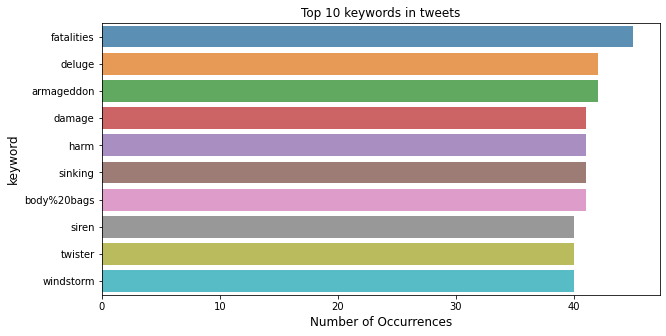

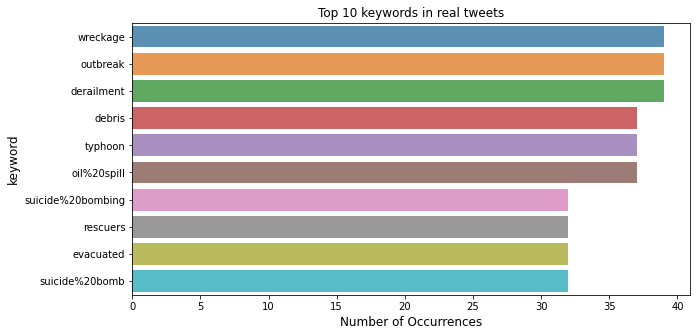

In [5]:
accident_count  = tweets['keyword'].value_counts()
accident_count = accident_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(accident_count.values, accident_count.index, alpha=0.8)
plt.title('Top 10 keywords in tweets')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

#Me quedo sólo con los tweets marcados como verdaderos
real_tweets = tweets[tweets.target == 1]
real_tweets.head()

accident_count_real  = real_tweets['keyword'].value_counts()
accident_count_real = accident_count_real[:10,]
plt.figure(figsize=(10,5))
sns.barplot(accident_count_real.values, accident_count_real.index, alpha=0.8)
plt.title('Top 10 keywords in real tweets')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

#### ¿Los tweets más largos son verdaderos?


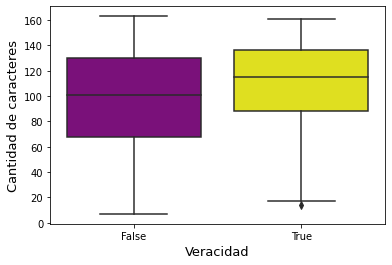

In [15]:
#Agrego columnas que tengan los valores del largo de los tweets y para cada uno, si es verdadero o no:

tweets['tweet_length'] = tweets['text'].str.len()
tweets['veracity'] = (tweets.target == 1)

myPalette = sns.set_palette(sns.color_palette(['darkmagenta', 'yellow']))
bplot = sns.boxplot(x='veracity', y='tweet_length', data=tweets, palette=myPalette)

bplot.set_xlabel("Veracidad", fontsize=13)
bplot.set_ylabel("Cantidad de caracteres", fontsize=13)
bplot.tick_params(labelsize=10)

In [7]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [8]:
(tweets['keyword'].value_counts()).describe()

count    221.000000
mean      34.171946
std        4.786091
min        9.000000
25%       33.000000
50%       35.000000
75%       37.000000
max       45.000000
Name: keyword, dtype: float64

In [9]:
grouped = tweets.groupby(['keyword']).agg({'target':['count', 'min', 'mean', 'max']})
grouped

target                  
                     count min      mean max
keyword                                     
ablaze                  36   0  0.361111   1
accident                35   0  0.685714   1
aftershock              34   0  0.000000   0
airplane%20accident     35   0  0.857143   1
ambulance               38   0  0.526316   1
...                    ...  ..       ...  ..
wounded                 37   0  0.702703   1
wounds                  33   0  0.303030   1
wreck                   37   0  0.189189   1
wreckage                39   1  1.000000   1
wrecked                 39   0  0.076923   1

[221 rows x 4 columns]

In [10]:
grouped.loc[grouped[('target','mean')]>0.5,:].sort_values(('target','count'),ascending=False)

target                  
                       count min      mean max
keyword                                       
fatalities                45   0  0.577778   1
evacuate                  40   0  0.625000   1
outbreak                  40   0  0.975000   1
collided                  40   0  0.575000   1
wreckage                  39   1  1.000000   1
...                      ...  ..       ...  ..
bombing                   29   0  0.931034   1
volcano                   27   0  0.666667   1
bush%20fires              25   0  0.720000   1
forest%20fire             19   0  0.789474   1
radiation%20emergency      9   0  0.555556   1

[86 rows x 4 columns]

### *Análisis de Ubicación*

Continuando con el análisis, veremos a través de un Top 7 cuales son las ubicaciones que realizan más tweets, y si existe alguna relación entre la veracidad de estos tweets con las ubicaciones del ranking.  


In [11]:
tweets['location']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: location, Length: 7613, dtype: object

In [12]:
tweets['location'].isnull().sum()

2533

In [13]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

En este primer análisis se puede apreciar que un tercio del total de los tweets no se tiene información de su ubicación.

#### Top 7 de Ubicaciones

In [14]:
tweets['location'].value_counts().head(7)      # agregar grafico

USA              104
New York          71
United States     50
London            45
Canada            29
Nigeria           28
UK                27
Name: location, dtype: int64